In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
ipl = pd.read_csv("C:/courwera/new_py/ipl_matches.csv")

In [3]:
ipl

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
ipl.isnull().sum().sum()

656

In [11]:
ipl.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [13]:
ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [15]:
ipl = ipl.dropna(subset=['winner'])

In [17]:
ipl

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [19]:
ipl['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [21]:
ipl.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            634
dtype: int64

In [23]:
ipl[ipl['city'].isna()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [25]:
ipl

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [27]:
ipl['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [29]:
ipl['city'].fillna('Dubai', inplace=True)

In [31]:
ipl

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [33]:
ipl['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [35]:
ipl['city'] = ipl['city'].replace('Bengaluru', 'Bangalore')

In [37]:
ipl['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [39]:
ipl['city'].isnull().sum()

0

In [41]:
ipl=ipl.drop(['umpire1','umpire2','umpire3'],axis=1)

In [43]:
ipl

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


In [45]:
ipl.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [47]:
ipl['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [49]:
team_map = {
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Delhi Daredevils': 'Delhi Capitals'
}
columns = ['team1', 'team2', 'toss_winner', 'winner']
for col in columns:
    ipl[col] = ipl[col].replace(team_map)

In [51]:
ipl['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [53]:
ipl['year'] = ipl['Season'].str.extract(r'(\d{4})')
ipl['year'] = ipl['year'].astype(int)
ipl = ipl.drop('Season', axis=1)

In [55]:
ipl.drop(columns=['date', 'id'], inplace=True)

In [57]:
ipl

,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,year
0,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",2017
1,Pune,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,2017
2,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,2017
3,Indore,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,2017
4,Bangalore,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,2019
752,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,2019
753,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,2019
754,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,2019


In [59]:
#labelencoder = LabelEncoder()
#ipl['toss_decision'] = labelencoder.fit_transform(ipl['toss_decision'])

### EDA

In [63]:
order = ipl['winner'].value_counts().sort_values(ascending=False).index


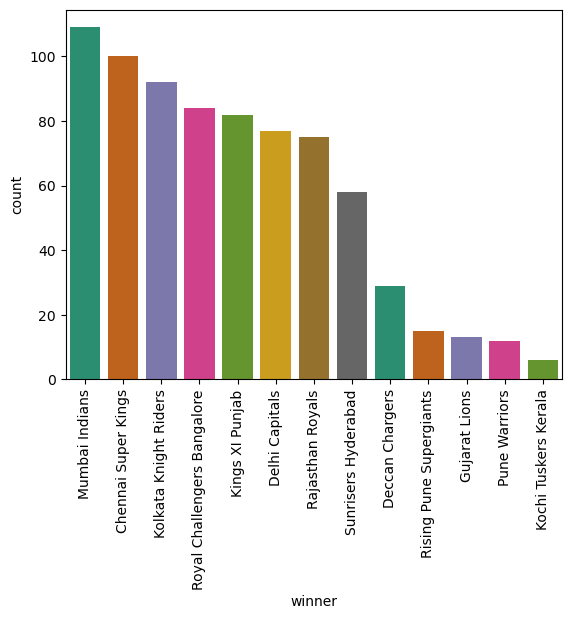

In [65]:
sns.countplot(x='winner', data=ipl,order=order,palette="Dark2")
plt.xticks(rotation=90)  
plt.show()


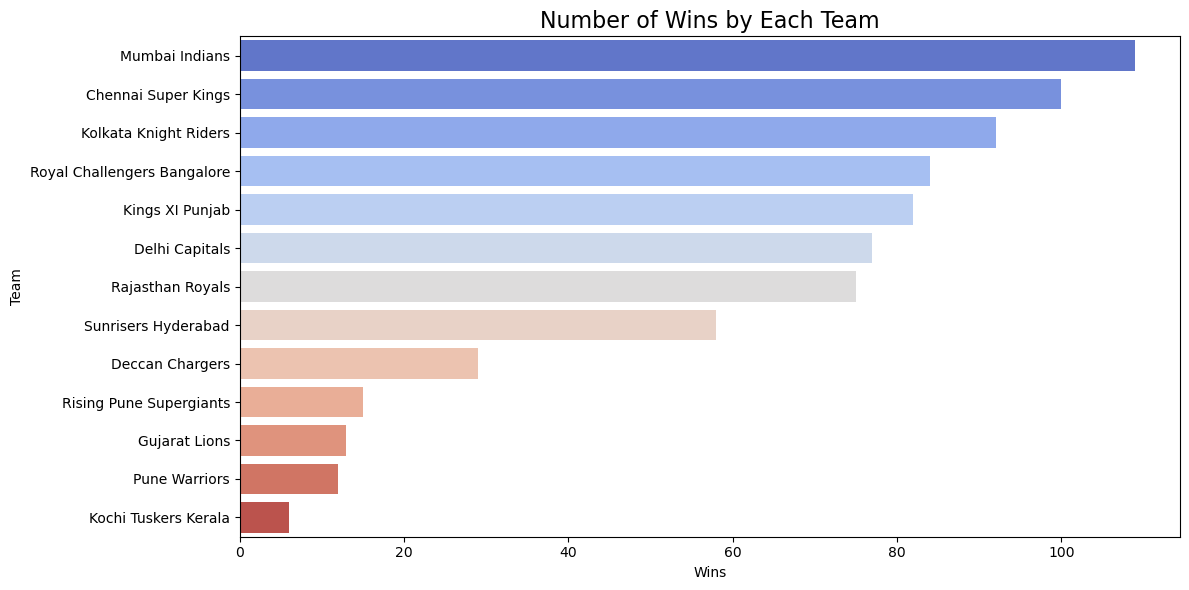

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y='winner', data=ipl, order=ipl['winner'].value_counts().index, palette='coolwarm')
plt.title("Number of Wins by Each Team", fontsize=16)
plt.xlabel("Wins")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


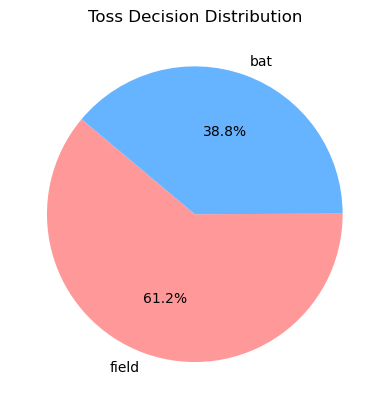

In [34]:
ipl['toss_decision'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title("Toss Decision Distribution")
plt.ylabel("")
plt.show()

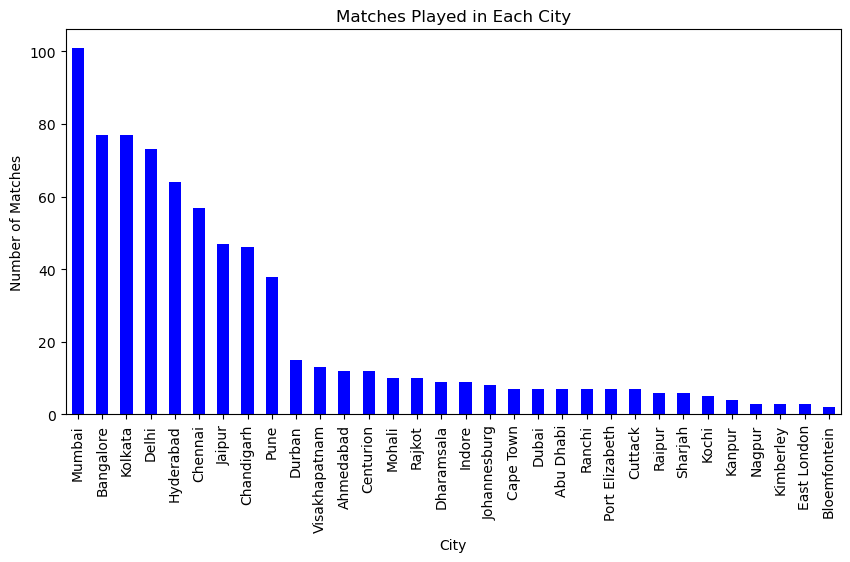

In [35]:
plt.figure(figsize=(10, 5))
ipl['city'].value_counts().plot(kind='bar', color='blue')
plt.title('Matches Played in Each City')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

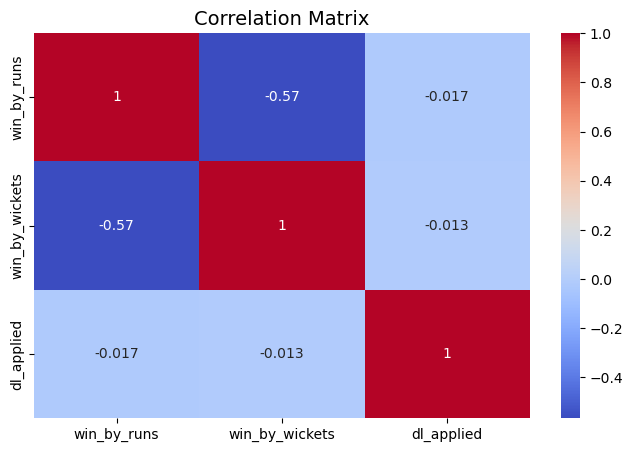

In [36]:
plt.figure(figsize=(8, 5))
sns.heatmap(ipl[['win_by_runs', 'win_by_wickets', 'dl_applied']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=14)
plt.show()

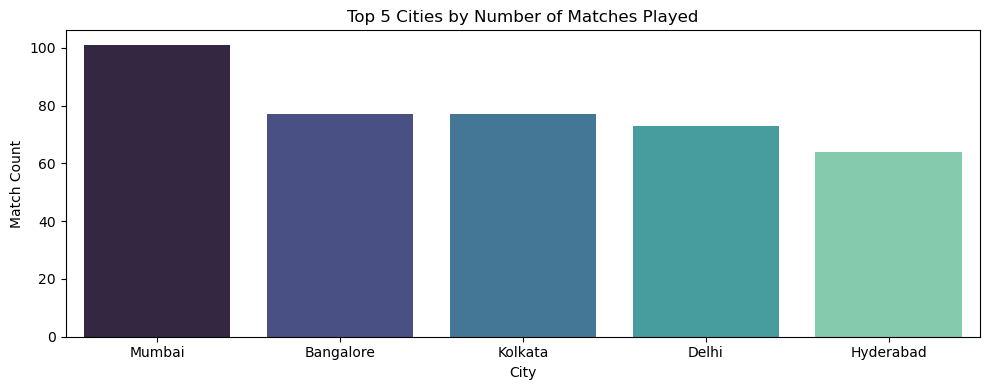

In [37]:
top5_cities = ipl['city'].value_counts().nlargest(5).index
top5_city_data = ipl[ipl['city'].isin(top5_cities)]

plt.figure(figsize=(10, 4))
sns.countplot(data=top5_city_data, x='city', order=top5_cities, palette='mako')
plt.title("Top 5 Cities by Number of Matches Played")
plt.xlabel("City")
plt.ylabel("Match Count")
plt.tight_layout()
plt.show()

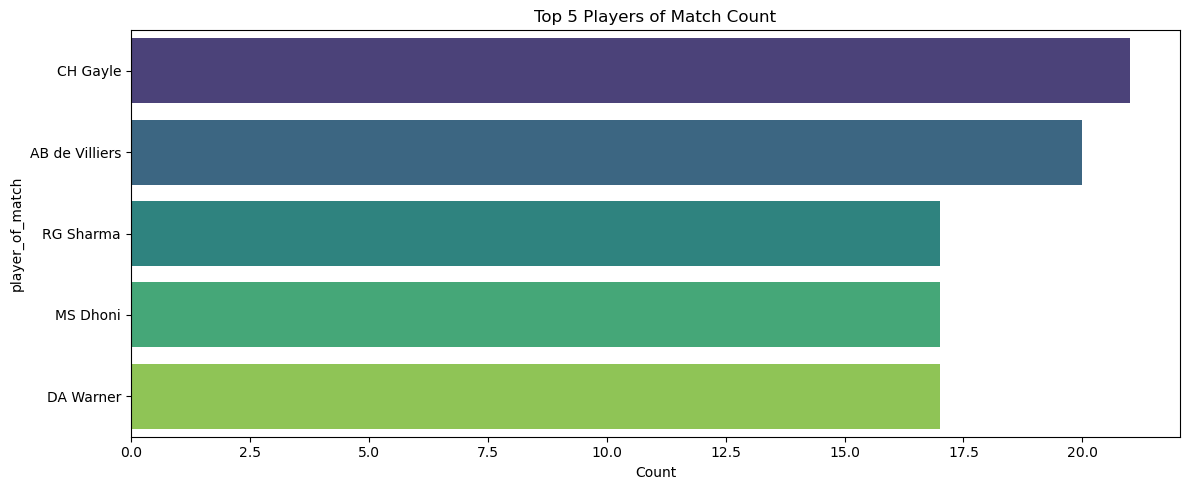

In [38]:
top_players = ipl['player_of_match'].value_counts().head(5).index
plt.figure(figsize=(12, 5))
sns.countplot(y='player_of_match', data=ipl[ipl['player_of_match'].isin(top_players)],
              order=top_players, palette='viridis')
plt.title('Top 5 Players of Match Count')
plt.ylabel('player_of_match')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

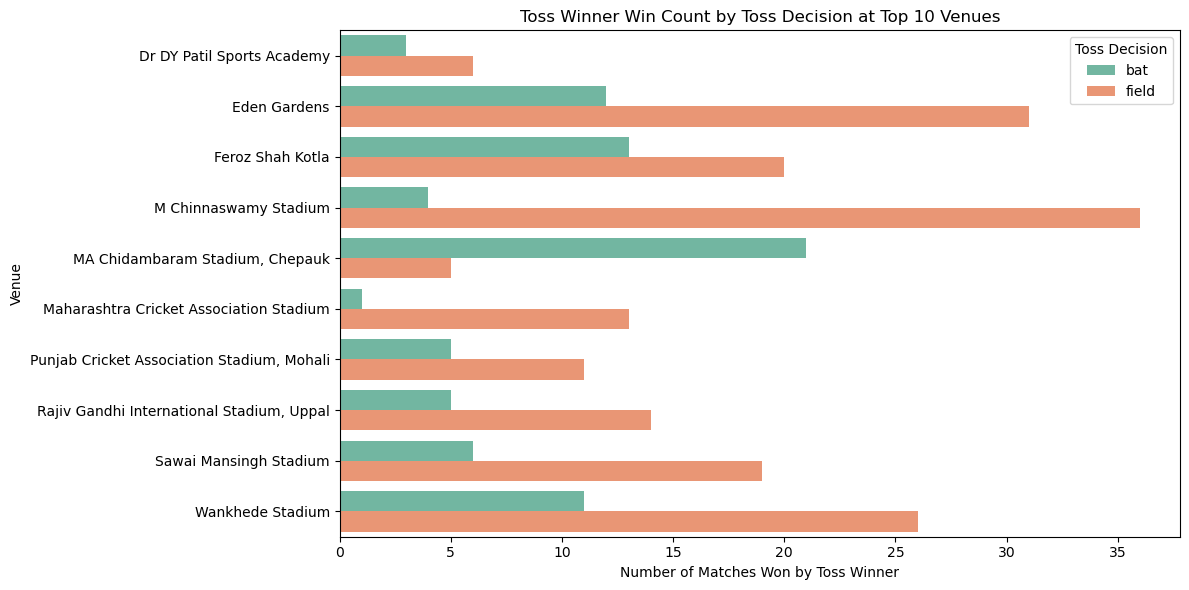

In [39]:
toss_win_ipl = ipl[ipl['toss_winner'] == ipl['winner']]
venue_toss_win = toss_win_ipl.groupby(['venue', 'toss_decision']).size().reset_index(name='count')
top_venues = (
    venue_toss_win.groupby('venue')['count'].sum()
    .sort_values(ascending=False).head(10).index
)
venue_toss_win_top = venue_toss_win[venue_toss_win['venue'].isin(top_venues)]
plt.figure(figsize=(12, 6))
sns.barplot(y='venue', x='count', hue='toss_decision', data=venue_toss_win_top, palette='Set2')
plt.title('Toss Winner Win Count by Toss Decision at Top 10 Venues')
plt.ylabel('Venue')
plt.xlabel('Number of Matches Won by Toss Winner')
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()


In [40]:
ipl.shape

(752, 13)

In [41]:
label= LabelEncoder()
for column in ipl.columns:
    ipl[column]=label.fit_transform(ipl[column])

In [42]:

X = ipl.drop(columns=['winner']) 
y = ipl['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training &  Evaluation

In [44]:

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.31125827814569534


In [45]:

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("Logistic Regression")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")

Logistic Regression
Training Accuracy: 0.3444
Testing Accuracy : 0.3113


In [46]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.32      0.50      0.39        18
           1       0.23      0.38      0.29         8
           2       0.11      0.06      0.07        18
           3       0.00      0.00      0.00         2
           4       0.40      0.24      0.30        17
           5       0.00      0.00      0.00         1
           6       0.36      0.43      0.39        21
           7       0.27      0.50      0.35        18
           8       0.00      0.00      0.00         1
           9       0.50      0.25      0.33        20
          10       0.00      0.00      0.00         3
          11       0.33      0.33      0.33        15
          12       0.29      0.22      0.25         9

    accuracy                           0.31       151
   macro avg       0.22      0.22      0.21       151
weighted avg       0.31      0.31      0.29       151



In [47]:
print(confusion_matrix(y_test, y_pred_lr))

[[9 3 2 0 1 0 0 2 0 0 0 0 1]
 [3 3 2 0 0 0 0 0 0 0 0 0 0]
 [7 2 1 1 1 0 1 2 0 0 0 1 2]
 [0 0 1 0 0 0 0 1 0 0 0 0 0]
 [3 0 1 0 4 0 2 3 0 2 0 2 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [2 3 2 0 0 0 9 4 0 0 0 0 1]
 [3 1 0 0 1 0 3 9 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 3 0 3 3 0 5 0 4 1]
 [0 0 0 0 0 0 2 1 0 0 0 0 0]
 [0 1 0 0 0 0 2 4 0 3 0 5 0]
 [0 0 0 0 0 0 2 3 0 0 0 2 2]]


In [48]:
scores = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='accuracy')
print(f"CV Accuracy: {scores.mean():.4f}")

CV Accuracy: 0.2646


In [49]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.25165562913907286
              precision    recall  f1-score   support

           0       0.32      0.67      0.44        18
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00         1
           6       0.45      0.24      0.31        21
           7       0.30      0.72      0.43        18
           8       0.00      0.00      0.00         1
           9       0.19      0.15      0.17        20
          10       0.00      0.00      0.00         3
          11       0.13      0.33      0.19        15
          12       0.00      0.00      0.00         9

    accuracy                           0.25       151
   macro avg       0.11      0.16      0.12       151
weighted avg       0.18      0.25      0.19       151



In [50]:
print(confusion_matrix(y_test, y_pred_svm))

[[12  0  0  0  1  0  0  3  0  1  0  1  0]
 [ 2  0  0  0  0  0  0  2  0  1  0  3  0]
 [ 6  0  0  0  1  0  0  4  0  2  0  5  0]
 [ 0  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  0  1  2  0  6  0  6  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  2  0  5  4  0  0  0  6  0]
 [ 2  0  0  0  0  0  1 13  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 2  0  0  0  0  0  3  6  0  3  0  6  0]
 [ 1  0  0  0  0  0  0  0  0  1  0  1  0]
 [ 5  0  0  0  0  0  1  3  0  1  0  5  0]
 [ 1  0  0  0  0  0  0  5  0  0  0  3  0]]


In [51]:
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("SVM")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")

SVM
Training Accuracy: 0.2646
Testing Accuracy : 0.2517


In [52]:
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("SVM")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")

SVM
Training Accuracy: 0.2646
Testing Accuracy : 0.2517


In [53]:
scores = cross_val_score(SVC(), X, y, cv=5, scoring='accuracy')
print(f"CV Accuracy: {scores.mean():.4f}")

CV Accuracy: 0.2474


In [54]:
grid_search = GridSearchCV(estimator=svm,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
grid_search.fit(X_train,y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best param is {best_param}")
print(f"Best score is {best_score}")

NameError: name 'param_grid' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

In [ ]:
print(confusion_matrix(y_test, y_pred_knn))

In [ ]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("KNN")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")


In [ ]:
scores = cross_val_score(KNeighborsClassifier(), X, y, cv=5, scoring='accuracy')
print(f"CV Accuracy: {scores.mean():.4f}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

In [ ]:
print(confusion_matrix(y_test, y_pred_dt))

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print("Decision Tree")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")

In [ ]:

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='accuracy')
print(f"CV Accuracy: {scores.mean():.4f}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print("Random Forest")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")

In [ ]:


scores = cross_val_score(RandomForestClassifier(), X, y, cv=5, scoring='accuracy')
print(f"CV Accuracy: {scores.mean():.4f}")

In [ ]:
#pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

In [ ]:
print(confusion_matrix(y_test, y_pred_xgb))

In [ ]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print("XGBoost")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Store results
results = []

# Fit, predict and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    # Determine fitting status
    if train_acc > 0.90 and abs(train_acc - test_acc) < 0.05:
        status = "Best Fitting"
    elif train_acc - test_acc > 0.1:
        status = "Overfitting"
    elif train_acc < 0.75 and test_acc < 0.75:
        status = "Underfitting"
    else:
        status = "Moderate Fit"

    results.append({
        'Model': name,
        'Training Accuracy': round(train_acc, 4),
        'Testing Accuracy': round(test_acc, 4),
        'Status': status
    })

# Display as DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Testing Accuracy", ascending=False).reset_index(drop=True)

print("Model Accuracy and Fit Analysis")
print(results_df)

### Hyperparameter Tuning

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

def run_grid_search(name, model, param_grid):
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train, y_train)

    print(f"Best Parameters for {name}: {grid.best_params_}")
    print(f"Best F1 Score: {grid.best_score_:.4f}")
    return grid.best_estimator_





In [65]:
from sklearn.linear_model import LogisticRegression

lr_param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [500, 1000]
}

best_lr = run_grid_search("Logistic Regression", LogisticRegression(), lr_param_grid)


Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 Score: 0.2851


In [59]:

y_train_pred = lr_param_grid.predict(X_train)
y_test_pred = lr_param_grid.predict(X_test)

print("Logistic Regression")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")

NameError: name 'lr_param_grid' is not defined

In [ ]:
print(classification_report(y_test, y_pred_lr))

In [ ]:
from sklearn.svm import SVC

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

best_svm = run_grid_search("SVM", SVC(), svm_param_grid)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

best_knn = run_grid_search("KNN", KNeighborsClassifier(), knn_param_grid)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_dt = run_grid_search("Decision Tree", DecisionTreeClassifier(random_state=42), dt_param_grid)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

best_rf = run_grid_search("Random Forest", RandomForestClassifier(random_state=42), rf_param_grid)


In [ ]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

best_xgb = run_grid_search("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), xgb_param_grid)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)


In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("🔹 Logistic Regression (No Sampling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
#pip install imbalanced-learn

In [ ]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
grid_search.fit(X_train,y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best param is {best_param}")
print(f"Best score is {best_score}")

In [ ]:
# 1. Import SMOTE
from imblearn.over_sampling import SMOTE

# 2. Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. You can now use X_train_resampled and y_train_resampled for training
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


In [ ]:
# Standard train-test split
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

# Now train your models with:
# model.fit(X_train_resampled, y_train_resampled)


In [ ]:
model.fit(X_train, y_train)


In [ ]:
model.fit(X_train_resampled, y_train_resampled)